# Implementing Perceptron from Scratch

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('placement.csv')

In [ ]:
print(df.shape)
df.head()

(100, 3)


,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


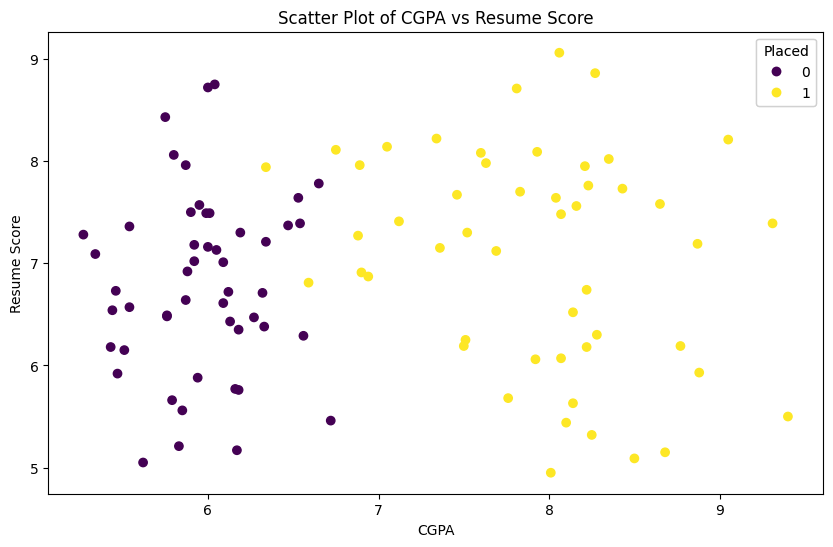

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x=df.cgpa, y=df['resume_score'], c=df.placed, cmap='viridis', label=df.placed)

legend1 = plt.legend(*scatter.legend_elements(), title="Placed")
plt.gca().add_artist(legend1)

plt.xlabel('CGPA')
plt.ylabel('Resume Score')
plt.title('Scatter Plot of CGPA vs Resume Score')
plt.show()


In [ ]:
X = df.iloc[:, 0:2] # Input Columns
y = df.iloc[:,-1]

from sklearn.linear_model import Perceptron
p = Perceptron().fit(X,y)


In [ ]:
p.coef_

array([[ 40.26, -36.  ]])

In [ ]:
p.intercept_

array([-25.])

In [ ]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

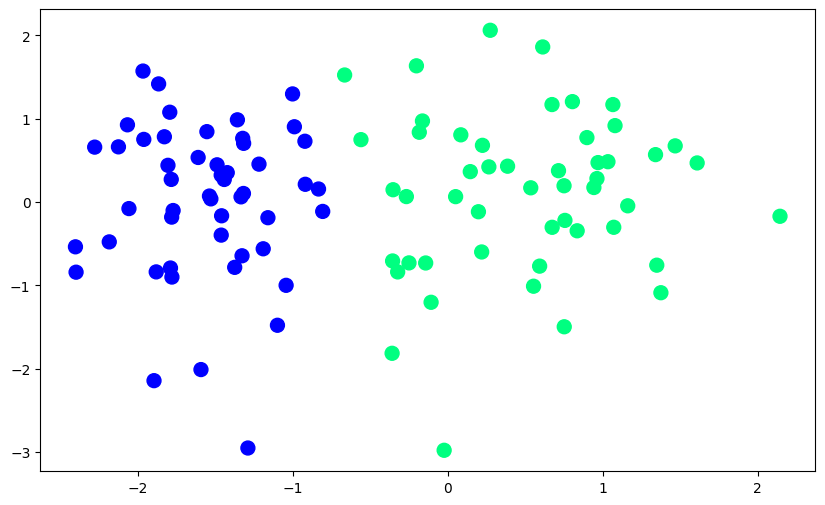

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = 'winter', s = 100)

In [ ]:
def perceptron(X,y):
  X = np.insert(X, 0, 1, axis = 1)
  weights = np.ones(X.shape[1])
  lr = 0.1
  epoch = 1000

  for i in range(epoch) :
    student = np.random.randint(0, X.shape[0])
    y_hat = step(np.dot(X[student], weights))
    weights = weights + lr * (y[student] - y_hat) * X[student]

  return weights[0], weights[1:]

def step(z):
  return 1 if z>0 else 0

In [ ]:
perceptron(X,y)

(0.9, array([1.43317731, 0.07502128]))

# Artificial Neural Network - Multi Layer Perceptron

## Regression Problem

### Self Implementation

In [1]:
import numpy as np
import pandas as pd

df = pd.DataFrame([[8,8,4],[7,9,5],[6,10,6],[5,12,7]], columns=['cgpa', 'profile_score', 'lpa'])

In [2]:
def initialize_parameters(layer_dims):

  np.random.seed(3)
  parameters = {}
  L = len(layer_dims)

  for l in range(1, L):

    parameters['W' + str(l)] = np.ones((layer_dims[l-1], layer_dims[l]))*0.1
    parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))


  return parameters

In [3]:
def linear_forward(A_prev, W, b):

  Z = np.dot(W.T, A_prev) + b

  return Z

In [4]:
# Forward Prop
def L_layer_forward(X, parameters):

  A = X
  L = len(parameters) // 2                  # number of layers in the neural network

  for l in range(1, L+1):
    A_prev = A
    Wl = parameters['W' + str(l)]
    bl = parameters['b' + str(l)]
    #print("A"+str(l-1)+": ", A_prev)
    #print("W"+str(l)+": ", Wl)
    #print("b"+str(l)+": ", bl)
    #print("--"*20)

    A = linear_forward(A_prev, Wl, bl)
    #print("A"+str(l)+": ", A)
    #print("**"*20)

  return A,A_prev

In [5]:
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[0][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X, parameters)

In [6]:
def update_parameters(parameters,y,y_hat,A1,X):
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.001 * 2 * (y - y_hat)*A1[0][0])
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat)*A1[1][0])
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat))

  parameters['W1'][0][0] = parameters['W1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[0][0])
  parameters['W1'][0][1] = parameters['W1'][0][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[1][0])
  parameters['b1'][0][0] = parameters['b1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0])

  parameters['W1'][1][0] = parameters['W1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[0][0])
  parameters['W1'][1][1] = parameters['W1'][1][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[1][0])
  parameters['b1'][1][0] = parameters['b1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0])

In [7]:
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[0][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

{'W1': array([[0.10658137, 0.10658137],
        [0.10658137, 0.10658137]]),
 'b1': array([[0.00082267],
        [0.00082267]]),
 'W2': array([[0.111776],
        [0.111776]]),
 'b2': array([[0.119136]])}

In [8]:
X = df[['cgpa', 'profile_score']].values[1].reshape(2,1) # Shape(no of features, no. of training exaplme)
y = df[['lpa']].values[1][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

{'W1': array([[0.11458955, 0.1168776 ],
        [0.11458955, 0.1168776 ]]),
 'b1': array([[0.0019667],
        [0.0019667]]),
 'W2': array([[0.12712927],
        [0.12712927]]),
 'b2': array([[0.13612818]])}

In [9]:
X = df[['cgpa', 'profile_score']].values[1].reshape(2,1) # Shape(no of features, no. of training exaplme)
y = df[['lpa']].values[1][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

{'W1': array([[0.12339902, 0.12820406],
        [0.1234188 , 0.12822949]]),
 'b1': array([[0.00322519],
        [0.00322802]]),
 'W2': array([[0.14325344],
        [0.14357505]]),
 'b2': array([[0.15236016]])}

In [10]:
# Epochs Implementation

epochs = 5

for i in range(epochs) :
  Loss = []

  for j in range(0,df.shape[0]) :
    X = df[['cgpa', 'profile_score']].values[j].reshape(2,1)
    y = df[['lpa']].values[j][0]

    y_hat, A1 = L_layer_forward(X, parameters)
    y_hat = y_hat[0][0]

    update_parameters(parameters, y, y_hat, A1, X)

    Loss.append((y - y_hat) ** 2)

  print(f'Epoch {i+1}, Loss: {np.array(Loss).mean()}')

parameters

Epoch 1, Loss: 21.383289177305386
Epoch 2, Loss: 12.958116108672751
Epoch 3, Loss: 5.159657049548183
Epoch 4, Loss: 1.7494571169076822
Epoch 5, Loss: 1.1840276561262482


{'W1': array([[0.27284977, 0.39389663],
        [0.28284419, 0.41358259]]),
 'b1': array([[0.02851407],
        [0.03030976]]),
 'W2': array([[0.4248769 ],
        [0.48729066]]),
 'b2': array([[0.49027646]])}

### Keras Implementation


In [11]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras import layers
from keras.layers import Dense


In [12]:
model = Sequential()

model.add(Dense(2,activation = 'linear', input_dim = 2))
model.add(Dense(1,activation = 'linear'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.get_weights()

[array([[-1.0892391 ,  0.50229883],
        [ 0.6355052 ,  0.39719677]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.45439494],
        [-0.89001125]], dtype=float32),
 array([0.], dtype=float32)]

In [15]:
import numpy as np

new_weights = [
    np.array([[0.1, 0.1], [0.1, 0.1]], dtype=np.float32),
    np.array([0.1, 0.1], dtype=np.float32),
    np.array([[0.1], [0.1]], dtype=np.float32),
    np.array([0.1], dtype=np.float32)
]


In [16]:
model.set_weights(new_weights)

In [17]:
model.get_weights()

[array([[0.1, 0.1],
        [0.1, 0.1]], dtype=float32),
 array([0.1, 0.1], dtype=float32),
 array([[0.1],
        [0.1]], dtype=float32),
 array([0.1], dtype=float32)]

In [18]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss = 'mean_squared_error', optimizer = optimizer)

## Classification Problem

### Self Implementation

In [31]:
import numpy as np
import pandas as pd

df = pd.DataFrame([[8,8,1],[7,9,1],[6,10,0],[5,5,0]], columns=['cgpa', 'profile_score', 'placed'])

In [32]:
def parameters(layer_dims) :
  np.random.seed(3)
  parameters = {}
  L = len(layer_dims)

  for i in range(1, L) :
    parameters['W'+str(i)] = np.ones((layer_dims[i-1], layer_dims[i])) * 0.1
    parameters['b'+str(i)] = np.zeros((layer_dims[i], 1))

  return parameters

In [33]:
# Sigmoid Function
def sigmoid(Z):
  A = 1/(1+np.exp(-Z))
  return A

In [34]:
def linear_forward(A_prev, W, b) :
  Z = np.dot(W.T, A_prev) + b
  A = sigmoid(Z)

  return A


In [35]:
def L_layer_forward(X, parameters):

  A = X
  L = len(parameters) // 2                  # number of layers in the neural network

  for l in range(1, L+1):
    A_prev = A
    Wl = parameters['W' + str(l)]
    bl = parameters['b' + str(l)]
    #print("A"+str(l-1)+": ", A_prev)
    #print("W"+str(l)+": ", Wl)
    #print("b"+str(l)+": ", bl)
    #print("--"*20)

    A = linear_forward(A_prev, Wl, bl)
    #print("A"+str(l)+": ", A)
    #print("**"*20)

  return A,A_prev

In [36]:
def update_parameters(parameters,y,y_hat,A1,X):
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.0001 * (y - y_hat)*A1[0][0])
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.0001 * (y - y_hat)*A1[1][0])
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.0001 * (y - y_hat))

  parameters['W1'][0][0] = parameters['W1'][0][0] + (0.0001 * (y - y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0])*X[0][0])
  parameters['W1'][0][1] = parameters['W1'][0][1] + (0.0001 * (y - y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0])*X[1][0])
  parameters['b1'][0][0] = parameters['b1'][0][0] + (0.0001 * (y - y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0]))

  parameters['W1'][1][0] = parameters['W1'][1][0] + (0.0001 * (y - y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0])*X[0][0])
  parameters['W1'][1][1] = parameters['W1'][1][1] + (0.0001 * (y - y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0])*X[1][0])
  parameters['b1'][1][0] = parameters['b1'][1][0] + (0.0001 * (y - y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0]))

In [37]:
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1)
y = df[['placed']].values[0][0]

parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

print('Loss for this student - ',-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

parameters

Loss for this student -  0.613402628898913


{'W1': array([[0.10000513, 0.10000513],
        [0.10000513, 0.10000513]]),
 'b1': array([[6.41054186e-07],
        [6.41054186e-07]]),
 'W2': array([[0.10003815],
        [0.10003815]]),
 'b2': array([[0.100084]])}

In [39]:
# Epochs Implementation
parameters  = initialize_parameters([2,2,1])
epoch = 50

for i in range(1,epoch) :
  Loss =[]

  for j in range(0, df.shape[0]) :
    X = df[['cgpa', 'profile_score']].values[j].reshape(2,1)
    y = df[['placed']].values[j][0]

    y_hat, A1 = L_layer_forward(X, parameters)
    y_hat = y_hat[0][0]

    update_parameters(parameters, y, y_hat,A1,X)

    Loss.append(-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

  print('Epoch - ',i+1,'Loss - ',np.array(Loss).mean())

parameters

Epoch -  2 Loss -  0.7103199085929446
Epoch -  3 Loss -  0.6991702892802629
Epoch -  4 Loss -  0.6991679314811485
Epoch -  5 Loss -  0.6991655746710999
Epoch -  6 Loss -  0.6991632188496667
Epoch -  7 Loss -  0.699160864016399
Epoch -  8 Loss -  0.6991585101708473
Epoch -  9 Loss -  0.6991561573125619
Epoch -  10 Loss -  0.6991538054410936
Epoch -  11 Loss -  0.6991514545559935
Epoch -  12 Loss -  0.6991491046568126
Epoch -  13 Loss -  0.6991467557431024
Epoch -  14 Loss -  0.6991444078144144
Epoch -  15 Loss -  0.6991420608703007
Epoch -  16 Loss -  0.6991397149103132
Epoch -  17 Loss -  0.6991373699340042
Epoch -  18 Loss -  0.6991350259409265
Epoch -  19 Loss -  0.6991326829306324
Epoch -  20 Loss -  0.6991303409026751
Epoch -  21 Loss -  0.699127999856608
Epoch -  22 Loss -  0.6991256597919842
Epoch -  23 Loss -  0.6991233207083575
Epoch -  24 Loss -  0.6991209826052818
Epoch -  25 Loss -  0.699118645482311
Epoch -  26 Loss -  0.6991163093389996
Epoch -  27 Loss -  0.69911397417490

{'W1': array([[0.09994381, 0.09984855],
        [0.09994386, 0.09984856]]),
 'b1': array([[-3.31672494e-05],
        [-3.31686159e-05]]),
 'W2': array([[0.09922385],
        [0.09922395]]),
 'b2': array([[0.09916788]])}

### Keras Implementation

In [41]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras import layers
from keras.layers import Dense

In [43]:
model = Sequential()
model.add(Dense(2, activation = 'sigmoid', input_dim = 2))
model.add(Dense(1, activation = 'sigmoid'))

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model.get_weights()

[array([[-0.80122995,  1.1926585 ],
        [ 1.0696248 ,  0.7838677 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.14072359],
        [1.3837444 ]], dtype=float32),
 array([0.], dtype=float32)]

In [46]:
new_weights = [
    np.array([[0.1, 0.1], [0.1, 0.1]], dtype=np.float32),
    np.array([0.1, 0.1], dtype=np.float32),
    np.array([[0.1], [0.1]], dtype=np.float32),
    np.array([0.1], dtype=np.float32)
]

In [47]:
model.set_weights(new_weights)

In [49]:
optimizer = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [51]:
model.fit(df.iloc[:, 0:-1].values, df['placed'].values, epochs=50)

Epoch 1/50
1/1 [==============================] - 1s 756ms/step - loss: 0.6963
Epoch 2/50
1/1 [==============================] - 0s 14ms/step - loss: 0.6963
Epoch 3/50
1/1 [==============================] - 0s 18ms/step - loss: 0.6963
Epoch 4/50
1/1 [==============================] - 0s 15ms/step - loss: 0.6963
Epoch 5/50
1/1 [==============================] - 0s 17ms/step - loss: 0.6963
Epoch 6/50
1/1 [==============================] - 0s 13ms/step - loss: 0.6963
Epoch 7/50
1/1 [==============================] - 0s 13ms/step - loss: 0.6963
Epoch 8/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6963
Epoch 9/50
1/1 [==============================] - 0s 13ms/step - loss: 0.6962
Epoch 10/50
1/1 [==============================] - 0s 13ms/step - loss: 0.6962
Epoch 11/50
1/1 [==============================] - 0s 18ms/step - loss: 0.6962
Epoch 12/50
1/1 [==============================] - 0s 18ms/step - loss: 0.6962
Epoch 13/50
1/1 [==============================] - 0s 14ms/s